## 問題設定
日本人女性は、世界で一番睡眠時間が短いと言われている。  
そんな国において男性の睡眠時間はどうなっているのだろうか。  
そこで、男性の睡眠時間と女性の睡眠時間の関係を検証したい。  
つまり、男性の睡眠時間を女性の睡眠時間によって説明したい。

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import probplot
from statsmodels.tools.eval_measures import rmse

In [2]:
df = pd.read_csv('sleeptime.csv')

In [3]:
df.head()

,都道府県,男,女
0,北海道,475,467
1,青森県,488,472
2,岩手県,478,471
3,宮城県,470,463
4,秋田県,488,477


In [4]:
df[['男','女']].describe()

,男,女
count,47.000000,47.000000
mean,470.127660,457.340426
std,7.634638,7.047283
min,454.000000,448.000000
25%,466.500000,452.000000
50%,470.000000,455.000000
75%,475.000000,460.500000
max,488.000000,477.000000


In [5]:
y = df['男']
x = df['女']

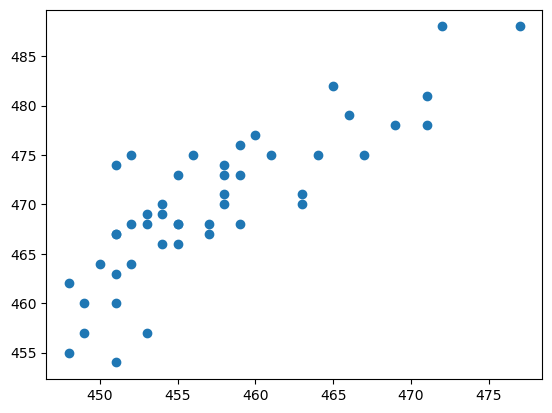

In [6]:
plt.scatter(x, y)

一見して、極端な外れ値や１つの説明変数で目的変数の取りうる値が複数ないので、  
このデータは回帰分析可能であると思われる。

In [7]:
p_s = 0.05

In [8]:
r, p = pearsonr(x,y)

In [9]:
p

3.564184721648239e-13

In [10]:
if p < p_s:
    print(f'x と y には相関があり、相関係数は{r:.4f}であった。')
else:
    print(f'x と y には相関がない可能性を排除できなかった')

x と y には相関があり、相関係数は0.8335であった。


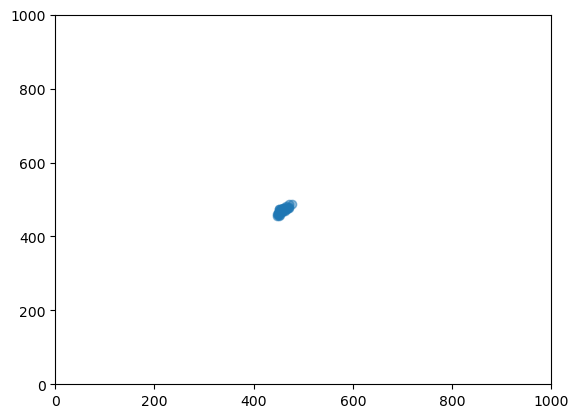

In [11]:
plt.scatter(x,y,alpha=0.5)
plt.xlim(xmin=0,xmax=1000)
plt.ylim(ymin=0,ymax=1000)
plt.show()

In [12]:
beta_0 =12.8
beta_1 = 1

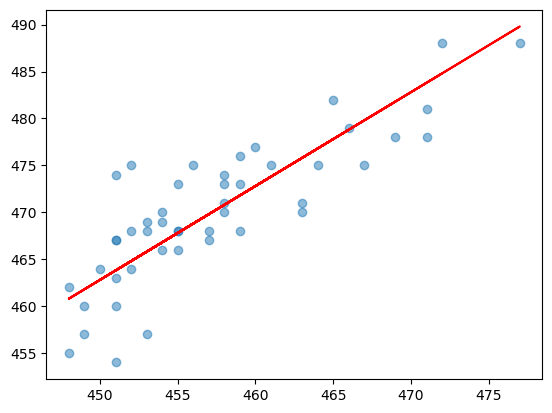

In [13]:
y_est = beta_0 + beta_1 * x
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c='r')
plt.show()

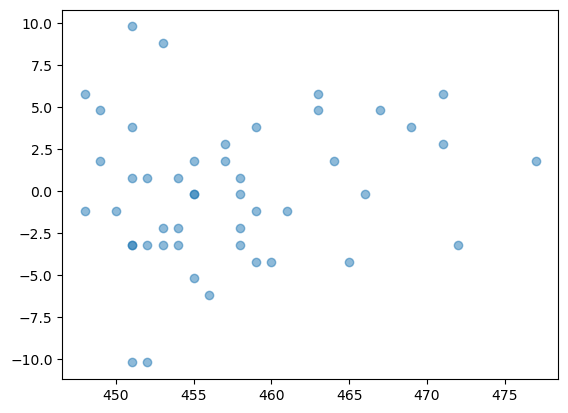

In [14]:
resid = y_est - y
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [15]:
np.sum(resid**2)

839.8799999999997

In [16]:
log = {
    "切片":[100,50,20,19,21,21,19,15,10,12,13,14,12.5,12.75,12.8],
    "傾き":[0.3,0.5,1,0.9,0.9,1,1,1,1,1,1,1,1,1,1],
    "誤差２乗和":[2551601,1724019,3285,84229,66987,4010,2654,1070,1205,869,842,909,843.75,839.9375,839.879]
    }

In [17]:
log_df = pd.DataFrame(log)
log_df

,切片,傾き,誤差２乗和
0,100.00,0.3,2.551601e+06
1,50.00,0.5,1.724019e+06
2,20.00,1.0,3.285000e+03
3,19.00,0.9,8.422900e+04
4,21.00,0.9,6.698700e+04
5,21.00,1.0,4.010000e+03
6,19.00,1.0,2.654000e+03
7,15.00,1.0,1.070000e+03
8,10.00,1.0,1.205000e+03
9,12.00,1.0,8.690000e+02


In [18]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
res = model.fit()

In [19]:
beta0_est, beta1_est = res.params

In [20]:
print(beta0_est)
print(beta1_est)

57.14807122767161
0.9030025890811575


In [21]:
y_est = beta0_est + beta1_est*x


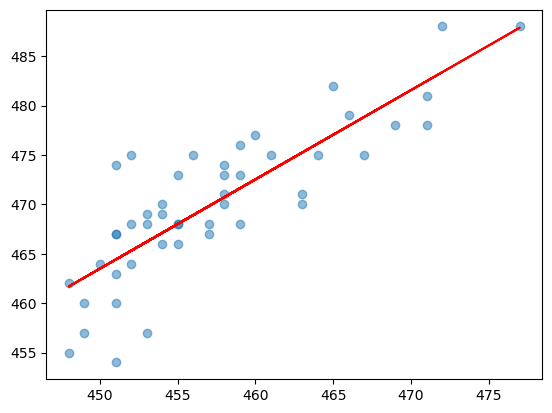

In [22]:
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c='r')
plt.show()

In [23]:
resid = y_est - y

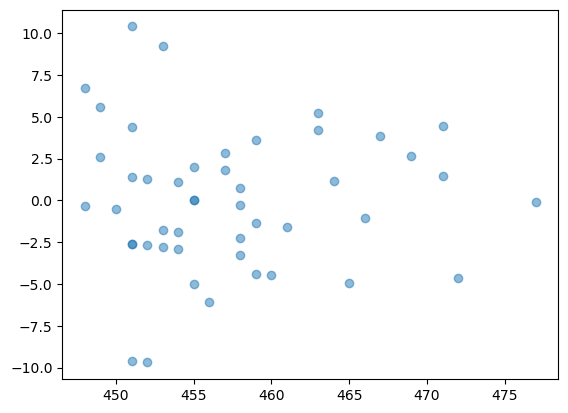

In [24]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [25]:
np.sum(resid**2)

818.3781269208561

In [26]:
df.describe()

,男,女
count,47.000000,47.000000
mean,470.127660,457.340426
std,7.634638,7.047283
min,454.000000,448.000000
25%,466.500000,452.000000
50%,470.000000,455.000000
75%,475.000000,460.500000
max,488.000000,477.000000


In [27]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      男   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     102.4
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.56e-13
Time:                        09:33:20   Log-Likelihood:                -133.83
No. Observations:                  47   AIC:                             271.7
Df Residuals:                      45   BIC:                             275.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.1481     40.809      1.400      0.1

結果  
切片の推定値：57.1481  
傾きの推定値：0.9030

都道府県ごとの男性の睡眠時間の平均(以下、男性の睡眠時間)に対する  
都道府県ごとの女性の睡眠時間の平均(以下、女性の睡眠時間)の単回帰係数の推定値は0.9030であった。  
すなわち、女性の睡眠時間が1分増加すると男性の睡眠時間は0.9030分増加する。  
これは、各都道府県ごとの男女の睡眠時間の平均の変化量に大きな差異はなく、  
県ごとの特徴が男女とも同じように表れたからだと思われる。

また、切片の推定値は57.1481分であった。  
すなわち、女性の睡眠時間が0分である時の男性の睡眠時間は57.1481分であると推定された。  
ただし、女性の睡眠時間が448分から477分の範囲のデータであり、  
0を含んでいないので、説明変数が0の時の目的変数について解釈することは意味をなさない。  
だが、今回の分析において切片の値は、目的変数である男性の睡眠時間が  
女性の睡眠時間に比べて平均的に57.1481分長いことを示していると思われる。

ただし、上記の議論は女性の睡眠時間が448分から477分の範囲のみで有効である。  
また、男性と女性の睡眠時間の関係性は必ずしも因果を説明している訳ではない。  
すなわち、男性の睡眠時間を増やすために女性の睡眠時間を操作する事が意味をなさない場合がある。  
また、この分析では女性の睡眠時間の他に男性の睡眠時間と関係を持つ要因を一切考慮していない。  
すなわち、データに加えられていない何らかの要因によって、  
女性の睡眠時間と男性の睡眠時間に疑似的な相関関係が生じている可能性を否定できない。

有意水準：5%


**結果**
* 切片のp値
  * 0.168
  * 5%で有意とは言えない
* 切片の95%信頼区間
  * [-25.046,139.342]の範囲
  * 0を含んでいる
* 傾きのp値
  * 0.000
  * 1%以下で有意
* 傾きの95%信頼区間
  * [0.723,1.083]の範囲
  * 0を含まないので有意

## 解釈
傾きについてはp値も95%信頼区間も有意な結果を得ることができた。  
切片では、p値も95%信頼区間も有意な結果を得られなかった。  
理由として考えられることは、この分析のデータがx軸に関して原点より離れた場所に集中的に分布しているので、  
推定される直線の傾きがほんの少し変わるだけで切片に大きな変化が生じてしまうからだと考えられる。  

都道府県ごとの男性の睡眠時間の平均(以下、男性の睡眠時間)に対する  
都道府県ごとの女性の睡眠時間の平均(以下、女性の睡眠時間)の  
回帰係数は5%の有意水準で正の値を持つ。  
すなわち、女性の睡眠時間は有意に男性の睡眠時間と正の相関を持つ。  
また、回帰係数の95%信頼区間は[0.723,1.083]の範囲であり、  
この範囲内に傾きの真値が存在すると考えることが整合的である。

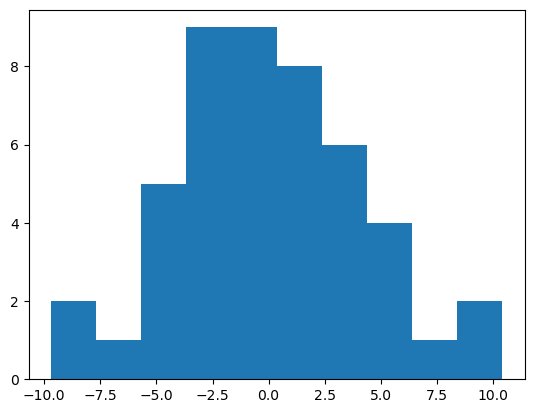

In [33]:
resid = y_est - y
plt.hist(resid)
plt.show()
# 誤差のヒストグラム

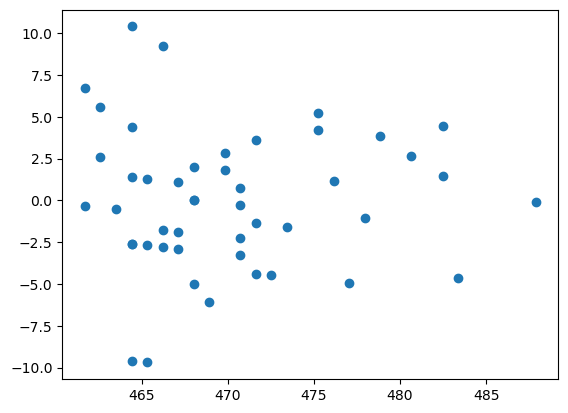

In [34]:
plt.scatter(y_est, resid)
plt.show()
# 残差プロット

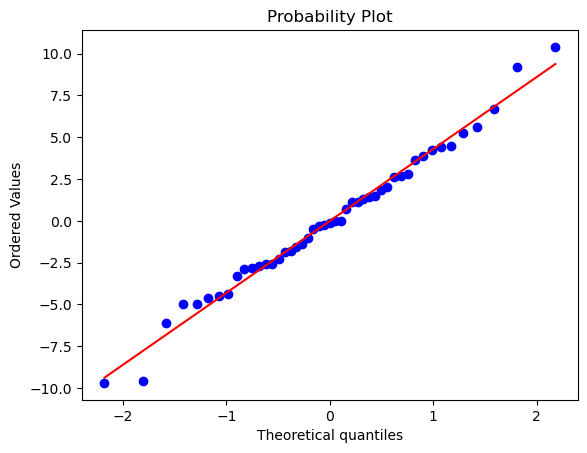

In [35]:
ax = plt.subplot()
probplot(resid, plot=ax)
plt.show()
# QQプロット

残差のヒストグラムを見ると左右非対称であり、１つの山を持つ釣り鐘型の形状をするため、  
正規分布に近い形状をしていることが分かる。  
残差プロットを見ると目的変数の推定値は残差と無関係であるため、  
独立であると言えそうである。  
QQプロットを見るとデータ点が直線上に概ね載っているため、  
正規分布に近い形状をしていることが分かる。  
以上の事から、今回の回帰分析モデルは誤差が独立な正規分布から発生しているという前提を満たすと判断される。

**結果**

* 決定係数  
  * 0.695
* F検定のp値  
  * 3.56 e-13
* AIC  
  * 271.7

In [42]:
# RMSE
rmse(y, y_est)

4.172804880746783

RMSEは4.173分であり、目的変数の推定値は真値に比べ平均的に4.173分程度差がある。  
決定係数は0.695であり、モデルによる目的変数の推定値によって、  
単純に目的変数を平均値で推定することに比べて、変動が69.5%小さくなる。  
F検定のp値は$3.56×10^{-13}$であり、有意水準5%で  
回帰係数はすべて0である(帰無仮説)は棄却され、  
回帰係数は少なくとも1つは0ではない(対立仮説)を採択するため、  
回帰分析モデルがデータに適合していると言える。  
また、AICは271.7であった。